# Análisis de Estilos de Juego en Pádel usando Clustering

Este notebook explora y perfila los estilos (ofensivo/defensivo) de jugadores de pádel a partir de estadísticas de partidos, usando técnicas de clustering no supervisado. Se inicia con un modelo base y, paso a paso, se mejora para aumentar la calidad del agrupamiento y la comprensión de los datos.


# Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Carga de los datos


Importamos el dataset y analizamos su estructura general: dimensiones, columnas, tipos y primeros valores.


In [70]:
import pandas as pd

df = pd.read_csv("padel.csv")

print("Dimensiones del dataset:", df.shape)
display(df.head())

print("\nNombres y tipos de columnas:")
print(df.dtypes)


# Estadísticas generales
print("\nResumen estadístico:")
display(df.describe(include='all'))


C:\Users\kenny\AppData\Local\Temp\ipykernel_32308\1323828240.py:3: DtypeWarning: Columns (6,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("padel.csv")


Dimensiones del dataset: (540300, 30)


,frame_idx,duration,total_frames,video_duration,player_id,player_name,team,zone,ball_position_x,ball_position_y,...,player_speed_mps,prev_speed,player_acceleration_mps2,ball_position_x_prev,ball_position_y_prev,ball_displacement,ball_speed_mps,time_since_last_hit,partido,punto
0,0,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
1,1,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
2,2,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
3,3,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
4,4,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0



Nombres y tipos de columnas:
frame_idx                          int64
duration                         float64
total_frames                       int64
video_duration                   float64
player_id                          int64
player_name                       object
team                              object
zone                              object
ball_position_x                  float64
ball_position_y                  float64
player_position_x                float64
player_position_y                float64
distance_ball_to_net             float64
distance_player_to_ball_m        float64
distance_player_to_net_m         float64
distance_player_to_teammate_m    float64
player_hits_ball                    bool
prev_x                           float64
prev_y                           float64
player_displacement              float64
player_speed_mps                 float64
prev_speed                       float64
player_acceleration_mps2         float64
ball_position_x_prev       

,frame_idx,duration,total_frames,video_duration,player_id,player_name,team,zone,ball_position_x,ball_position_y,...,player_speed_mps,prev_speed,player_acceleration_mps2,ball_position_x_prev,ball_position_y_prev,ball_displacement,ball_speed_mps,time_since_last_hit,partido,punto
count,540300.000000,540300.000000,540300.000000,540300.000000,540300.000000,519424,159382,540300,540300.000000,540300.000000,...,537585.000000,535092.000000,535092.000000,430743.000000,430743.000000,430743.0,430743.0,16361.000000,540300.0,519424.000000
unique,NaN,NaN,NaN,NaN,NaN,331,2,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN
top,NaN,NaN,NaN,NaN,NaN,María José Cifuentes,bottom,left_box,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,18532,81394,224013,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36172.0,NaN
mean,236.541947,0.024876,471.026461,11.333344,14.085208,NaN,NaN,NaN,4.239575,10.316255,...,1.585811,1.580268,-0.205568,4.208803,10.380320,0.0,0.0,2.877869,NaN,5.763627
std,208.280158,0.008320,273.626478,7.086376,44.588668,NaN,NaN,NaN,2.549286,4.537078,...,12.787924,12.776415,892.103624,2.576104,4.556784,0.0,0.0,3.367727,NaN,3.276996
min,0.000000,0.016667,72.000000,1.200000,1.000000,NaN,NaN,NaN,0.560000,0.311111,...,0.000000,0.000000,-44598.638900,0.560000,0.311111,0.0,0.0,0.000000,NaN,1.000000
25%,88.000000,0.016667,278.000000,6.566667,2.000000,NaN,NaN,NaN,2.200000,6.488889,...,0.000000,0.000000,0.000000,2.160000,6.488889,0.0,0.0,0.616667,NaN,3.000000
50%,181.000000,0.016773,420.000000,9.150000,3.000000,NaN,NaN,NaN,3.520000,10.622222,...,0.000000,0.000000,0.000000,3.520000,10.755556,0.0,0.0,1.766667,NaN,6.000000
75%,325.000000,0.033333,597.000000,14.833333,7.000000,NaN,NaN,NaN,6.200000,13.866667,...,1.697056,1.697056,0.000000,6.160000,13.955556,0.0,0.0,3.950000,NaN,9.000000


# Nulos y estadísticas descriptivas

Revisamos el porcentaje de valores nulos por columna y un resumen estadístico de las variables.


In [71]:
# Porcentaje de nulos por columna
null_percent = (df.isnull().mean() * 100).round(2)
print("\nPorcentaje de nulos por columna:")
display(null_percent)

# Estadísticas generales
print("\nResumen estadístico:")
display(df.describe(include='all'))



Porcentaje de nulos por columna:


frame_idx                         0.00
duration                          0.00
total_frames                      0.00
video_duration                    0.00
player_id                         0.00
player_name                       3.86
team                             70.50
zone                              0.00
ball_position_x                   0.00
ball_position_y                   0.00
player_position_x                 0.00
player_position_y                 0.00
distance_ball_to_net              0.00
distance_player_to_ball_m         0.00
distance_player_to_net_m          0.00
distance_player_to_teammate_m    52.29
player_hits_ball                  0.00
prev_x                            0.50
prev_y                            0.50
player_displacement               0.50
player_speed_mps                  0.50
prev_speed                        0.96
player_acceleration_mps2          0.96
ball_position_x_prev             20.28
ball_position_y_prev             20.28
ball_displacement        


Resumen estadístico:


,frame_idx,duration,total_frames,video_duration,player_id,player_name,team,zone,ball_position_x,ball_position_y,...,player_speed_mps,prev_speed,player_acceleration_mps2,ball_position_x_prev,ball_position_y_prev,ball_displacement,ball_speed_mps,time_since_last_hit,partido,punto
count,540300.000000,540300.000000,540300.000000,540300.000000,540300.000000,519424,159382,540300,540300.000000,540300.000000,...,537585.000000,535092.000000,535092.000000,430743.000000,430743.000000,430743.0,430743.0,16361.000000,540300.0,519424.000000
unique,NaN,NaN,NaN,NaN,NaN,331,2,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN
top,NaN,NaN,NaN,NaN,NaN,María José Cifuentes,bottom,left_box,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,18532,81394,224013,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36172.0,NaN
mean,236.541947,0.024876,471.026461,11.333344,14.085208,NaN,NaN,NaN,4.239575,10.316255,...,1.585811,1.580268,-0.205568,4.208803,10.380320,0.0,0.0,2.877869,NaN,5.763627
std,208.280158,0.008320,273.626478,7.086376,44.588668,NaN,NaN,NaN,2.549286,4.537078,...,12.787924,12.776415,892.103624,2.576104,4.556784,0.0,0.0,3.367727,NaN,3.276996
min,0.000000,0.016667,72.000000,1.200000,1.000000,NaN,NaN,NaN,0.560000,0.311111,...,0.000000,0.000000,-44598.638900,0.560000,0.311111,0.0,0.0,0.000000,NaN,1.000000
25%,88.000000,0.016667,278.000000,6.566667,2.000000,NaN,NaN,NaN,2.200000,6.488889,...,0.000000,0.000000,0.000000,2.160000,6.488889,0.0,0.0,0.616667,NaN,3.000000
50%,181.000000,0.016773,420.000000,9.150000,3.000000,NaN,NaN,NaN,3.520000,10.622222,...,0.000000,0.000000,0.000000,3.520000,10.755556,0.0,0.0,1.766667,NaN,6.000000
75%,325.000000,0.033333,597.000000,14.833333,7.000000,NaN,NaN,NaN,6.200000,13.866667,...,1.697056,1.697056,0.000000,6.160000,13.955556,0.0,0.0,3.950000,NaN,9.000000


## Eliminación de columnas con alto porcentaje de nulos

Eliminamos columnas que contienen demasiados valores faltantes (más del 50%) o que no aportan información relevante para el análisis. Esto es importante porque muchas filas nulas pueden afectar el modelo y el clustering.


In [72]:
# Identificamos columnas con más del 50% de nulos
cols_high_nulls = null_percent[null_percent > 50].index.tolist()
print("Columnas con >50% nulos:", cols_high_nulls)

# Eliminamos esas columnas
df_clean = df.drop(columns=cols_high_nulls)
print("Dimensiones después de eliminar columnas muy nulas:", df_clean.shape)


Columnas con >50% nulos: ['team', 'distance_player_to_teammate_m', 'time_since_last_hit']
Dimensiones después de eliminar columnas muy nulas: (540300, 27)


## Imputación de nulos en columnas seleccionadas

Rellenamos los valores nulos de variables importantes según el tipo de dato:
- Para variables numéricas: usamos la media/aritmética.
- Para posiciones previas o columnas secuenciales: usamos el método forward fill.
- Para variables de movimiento/pelota: si conviene, rellenamos con 0.


In [107]:
df_clean = df.copy()

cols_to_drop = [
    "team",                           # 70% nulos
    "distance_player_to_teammate_m",  # 52%
    "time_since_last_hit"             # 97%
]

df_clean = df_clean.drop(columns=[c for c in cols_to_drop if c in df_clean.columns])
print("Columnas eliminadas:", [c for c in cols_to_drop if c in df_clean.columns])

ball_prev_cols = ["ball_position_x_prev", "ball_position_y_prev"]
ball_motion_cols = ["ball_displacement", "ball_speed_mps"]

for col in ball_prev_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(method="ffill")

for col in ball_motion_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(0)

small_nulls_mean = [
    "player_displacement",
    "player_speed_mps",
    "prev_speed",
    "player_acceleration_mps2"
]

small_nulls_ffill = [
    "prev_x",
    "prev_y"
]

# Imputar por media
for col in small_nulls_mean:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# Forward fill para valores previos del jugador
for col in small_nulls_ffill:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(method="ffill")

# Rellenar nombre de jugador y punto (si existen)
if "player_name" in df_clean.columns:
    df_clean["player_name"] = df_clean["player_name"].fillna(method="ffill")

if "punto" in df_clean.columns:
    df_clean["punto"] = df_clean["punto"].fillna(method="ffill")

print("Dataset después de imputación:")
display(df_clean.head())

print("\nNulos restantes:")
display(df_clean.isnull().sum())


Columnas eliminadas: []
Dataset después de imputación:


C:\Users\kenny\AppData\Local\Temp\ipykernel_32308\4234885455.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[col] = df_clean[col].fillna(method="ffill")
C:\Users\kenny\AppData\Local\Temp\ipykernel_32308\4234885455.py:43: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[col] = df_clean[col].fillna(method="ffill")
C:\Users\kenny\AppData\Local\Temp\ipykernel_32308\4234885455.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean["player_name"] = df_clean["player_name"].fillna(method="ffill")
C:\Users\kenny\AppData\Local\Temp\ipykernel_32308\4234885455.py:50: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[

,frame_idx,duration,total_frames,video_duration,player_id,player_name,zone,ball_position_x,ball_position_y,player_position_x,...,player_displacement,player_speed_mps,prev_speed,player_acceleration_mps2,ball_position_x_prev,ball_position_y_prev,ball_displacement,ball_speed_mps,partido,punto
0,0,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,right_box,3.24,17.111111,1.48,...,0.03825,1.585811,1.580268,-0.205568,NaN,NaN,0.0,0.0,Partido 27,10.0
1,1,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,right_box,3.24,17.111111,1.48,...,0.00000,0.000000,1.580268,-0.205568,NaN,NaN,0.0,0.0,Partido 27,10.0
2,2,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,right_box,3.24,17.111111,1.48,...,0.00000,0.000000,0.000000,0.000000,NaN,NaN,0.0,0.0,Partido 27,10.0
3,3,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,right_box,3.24,17.111111,1.48,...,0.00000,0.000000,0.000000,0.000000,NaN,NaN,0.0,0.0,Partido 27,10.0
4,4,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,right_box,3.24,17.111111,1.48,...,0.00000,0.000000,0.000000,0.000000,NaN,NaN,0.0,0.0,Partido 27,10.0



Nulos restantes:


frame_idx                      0
duration                       0
total_frames                   0
video_duration                 0
player_id                      0
player_name                    0
zone                           0
ball_position_x                0
ball_position_y                0
player_position_x              0
player_position_y              0
distance_ball_to_net           0
distance_player_to_ball_m      0
distance_player_to_net_m       0
player_hits_ball               0
prev_x                         1
prev_y                         1
player_displacement            0
player_speed_mps               0
prev_speed                     0
player_acceleration_mps2       0
ball_position_x_prev         625
ball_position_y_prev         625
ball_displacement              0
ball_speed_mps                 0
partido                        0
punto                          0
dtype: int64

# Filtrado de registros con errores y por límites físicos

Eliminamos:
- Filas donde el nombre del jugador es tipo “Player_”
- Filas donde la velocidad del jugador supera 12 m/s (límite humano)
- Filas donde la distancia a la red es mayor a 12 m (tamaño de la cancha)


In [108]:
player_rows = df_clean[df_clean["player_name"].str.startswith("Player_")].shape[0]
total_filas = df_clean.shape[0]
porcentaje_filas = player_rows / total_filas * 100


print(f"📌 Porcentaje de filas corruptas: {porcentaje_filas:.2f}%")


print(df_clean.shape)
df_clean = df_clean[~df_clean["player_name"].str.startswith("Player_")]
print("Después de eliminar Player_:", df_clean.shape)

df_clean = df_clean[
    (df_clean["player_speed_mps"] <= 12) &               # velocidad humana
    (df_clean["distance_player_to_net_m"] <= 12)         # tamaño real de la cancha
]

print("Después del filtrado físico:", df_clean.shape)

📌 Porcentaje de filas corruptas: 39.47%
(540300, 27)
Después de eliminar Player_: (327066, 27)
Después del filtrado físico: (321773, 27)


# Agrupación y resumen por jugador y partido

Agrupamos los datos limpios por cada jugador en cada partido, calculando medias y sumas de variables relevantes para analizar el estilo de juego.


In [115]:
# Definimos las variables a resumir y su función de agregación
agg_dict = {
    "distance_player_to_net_m": "mean",
    "distance_player_to_ball_m": "mean",
    "player_position_x": "mean",
    "player_position_y": "mean",
    "player_speed_mps": ["mean", "max"],
    "player_acceleration_mps2": "mean",
    "player_displacement": "mean",
    "player_hits_ball": "sum",
    "punto": "nunique",
    "frame_idx": "max",
    "distance_ball_to_net": "mean",
    "ball_speed_mps": "mean"
}

df_match = df_clean.groupby(["player_name", "partido"]).agg(agg_dict)

# Cambiar nombres de columnas múltiples
df_match.columns = ['_'.join(col).strip() for col in df_match.columns.values]
df_match.reset_index(inplace=True)

print("Shape de la tabla agregada jugador-partido:", df_match.shape)
display(df_match.head())


Shape de la tabla agregada jugador-partido: (113, 15)


,player_name,partido,distance_player_to_net_m_mean,distance_player_to_ball_m_mean,player_position_x_mean,player_position_y_mean,player_speed_mps_mean,player_speed_mps_max,player_acceleration_mps2_mean,player_displacement_mean,player_hits_ball_sum,punto_nunique,frame_idx_max,distance_ball_to_net_mean,ball_speed_mps_mean
0,Andrea Julieth Sosa Rodriguez,17,2.899454,5.884212,3.577424,3.577424,0.425117,11.879394,-16.651618,0.014110,11,12,341,4.274484,0.0
1,Andrea Julieth Sosa Rodriguez,23,8.358809,11.923196,3.287687,3.287687,0.480396,11.879394,-25.400353,0.015954,16,9,326,4.201447,0.0
2,Andrea Julieth Sosa Rodriguez,Partido 29,3.342596,7.785804,8.127391,8.127391,0.779957,11.879394,-26.162787,0.025959,0,12,700,4.145949,0.0
3,Carlos Felipe Andrade Sáenz,19,8.427769,10.739759,-2.220524,-2.220524,1.825838,11.879394,-127.766626,0.060819,5,9,507,4.111161,0.0
4,Carlos Felipe Andrade Sáenz,21,4.280667,4.777936,3.742924,3.742924,0.482242,11.879394,-52.015042,0.016026,13,10,515,4.807844,0.0


## Selección de variables relevantes para clustering

Para identificar estilos ofensivo, defensivo y balanceado, se definen tres combinaciones de variables con baja correlación y sentido deportivo:


- **A:** [translate:player_speed_mps_mean], [translate:player_hits_ball_sum], [translate:distance_ball_to_net_mean]  
  Captura actividad física, participación activa en el partido y proximidad táctica, diferenciando jugadores ofensivos que atacan y participan más.

- **B:** [translate:distance_player_to_ball_m_mean], [translate:player_hits_ball_sum], [translate:distance_ball_to_net_mean]  
  Evalúa búsqueda de la pelota, frecuencia de golpeo y el área donde se juega la bola, permitiendo distinguir estilos defensivos y balanceados.

- **C:** [translate:player_displacement_mean], [translate:distance_player_to_net_m_mean], [translate:punto_nunique]  
  Mezcla movilidad, ubicación en cancha y cantidad de puntos jugados, útil para identificar balance entre actividad y ubicación defensiva u ofensiva.





In [164]:
# Combinaciones propuestas
features_A = [
    "player_speed_mps_mean",           # Velocidad promedio (actividad física, poco correlacionada con posición)
    "player_hits_ball_sum",            # Actividad/golpes: ofensivos suelen golpear más
    "distance_ball_to_net_mean"        # Lugar del juego: cerca de la red = ofensivo, lejos = defensivo
]
features_B = [
    "distance_player_to_ball_m_mean",
    "player_hits_ball_sum",
    "distance_ball_to_net_mean"
]
features_C = [
    "player_displacement_mean",        # Movimiento total 
    "distance_player_to_net_m_mean",   # Cercanía a la red (táctico)
    "punto_nunique"                    # Puntos únicos jugados: nivel de efectividad/involucramiento
]
feature_sets = [features_A, features_B, features_C]





## Comparación de combinaciones: clustering y resultados

Se aplica K-Means con k=3 porque el objetivo es agrupar estilos ofensivo, defensivo y balanceado, dando flexibilidad a encontrar jugadores con perfil mixto.  
La elección de k=3 permite analizar si los datos reflejan más de dos estilos y comparar visualmente el Silhouette Score y la agrupación en cada combinación, seleccionando la mejor para el análisis táctico.



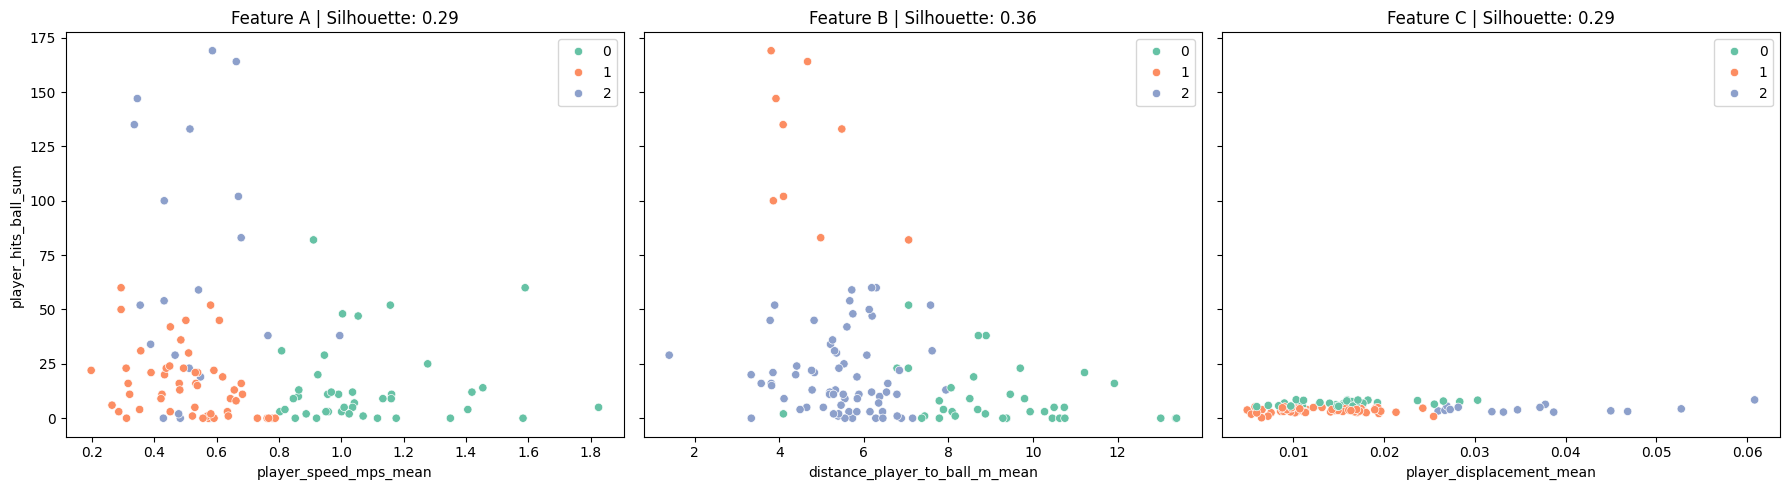

,Combinación,Variables,Silhouette Score
0,A,"[player_speed_mps_mean, player_hits_ball_sum, ...",0.285526
1,B,"[distance_player_to_ball_m_mean, player_hits_b...",0.355817
2,C,"[player_displacement_mean, distance_player_to_...",0.291123


In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

scores = []
arrays = []

# Crear gráficos comparativos
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
results_data = []

for i, feats in enumerate(feature_sets):
    X = df_match[feats].copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    scores.append(score)
    arrays.append(clusters)
    results_data.append({
        "Combinación": chr(65 + i),
        "Variables": feats,
        "Silhouette Score": score
    })

    sns.scatterplot(
        x=X.iloc[:,0],
        y=X.iloc[:,1],
        hue=clusters,
        palette="Set2",
        ax=axes[i]
    )
    axes[i].set_title(f"Feature {chr(65+i)} | Silhouette: {score:.2f}")
    axes[i].set_xlabel(feats[0])
    if i == 0:
        axes[i].set_ylabel(feats[1])
    else:
        axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

# Mostrar tabla comparativa
df_results = pd.DataFrame(results_data)
display(df_results)


# Comparación con clustering jerárquico

Para evaluar cuál agrupamiento es más robusto, se aplica Agglomerative Clustering (jerárquico) usando las mismas tres combinaciones de variables.  
Se compara el Silhouette Score y los gráficos obtenidos para definir si el jerárquico consigue mejor separación de estilos que K-Means.


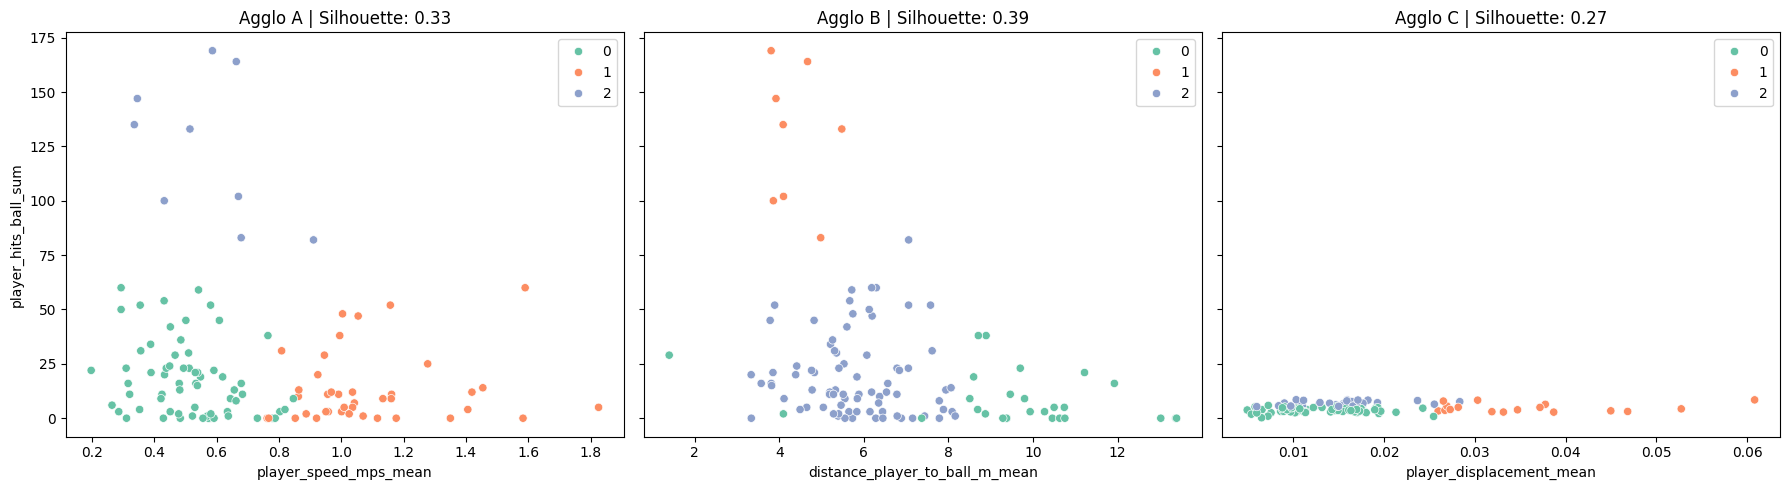

,Combinación,Variables,Silhouette Score
0,A,"[player_speed_mps_mean, player_hits_ball_sum, ...",0.330030
1,B,"[distance_player_to_ball_m_mean, player_hits_b...",0.392249
2,C,"[player_displacement_mean, distance_player_to_...",0.273710


In [166]:
from sklearn.cluster import AgglomerativeClustering

feature_sets = [features_A, features_B, features_C]
scores_agglo = []

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
results_data = []

for i, feats in enumerate(feature_sets):
    X = df_match[feats].copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    agglo = AgglomerativeClustering(n_clusters=3)
    clusters_agglo = agglo.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters_agglo)
    scores_agglo.append(score)
    results_data.append({
        "Combinación": chr(65 + i),
        "Variables": feats,
        "Silhouette Score": score
    })

    sns.scatterplot(
        x=X.iloc[:,0],
        y=X.iloc[:,1],
        hue=clusters_agglo,
        palette="Set2",
        ax=axes[i]
    )
    axes[i].set_title(f"Agglo {chr(65+i)} | Silhouette: {score:.2f}")
    axes[i].set_xlabel(feats[0])
    if i == 0:
        axes[i].set_ylabel(feats[1])
    else:
        axes[i].set_ylabel("")
        
plt.tight_layout()
plt.show()

# Tabla comparativa
df_results_agglo = pd.DataFrame(results_data)
display(df_results_agglo)
